### 1. Differential Expression Analysis
1. Differential expression analysis
2. The ExpressionSet class
3. The limma package


#### 1.1 Differential Expression Analysis
1. Differential expression data
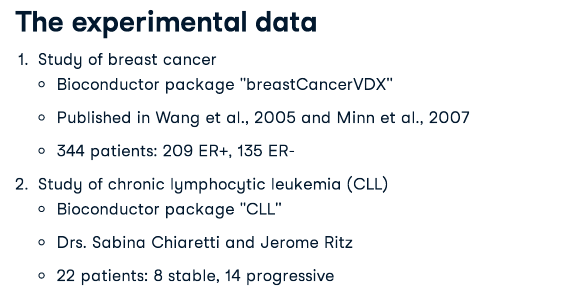
* Matrix(x)
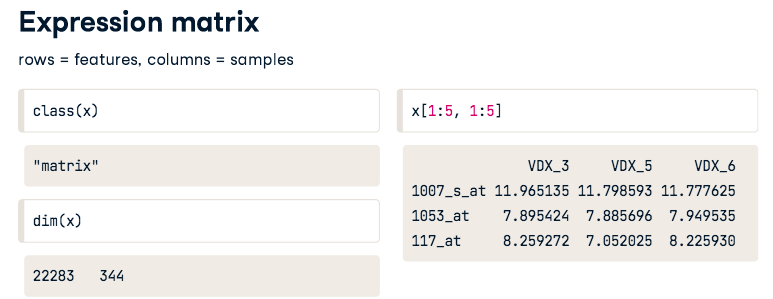

* feature attributes
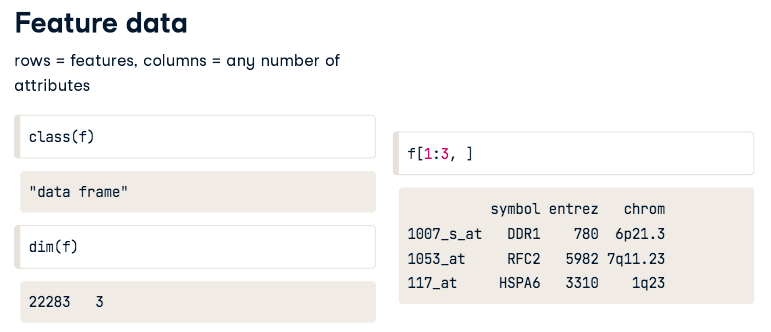
* phenotype 
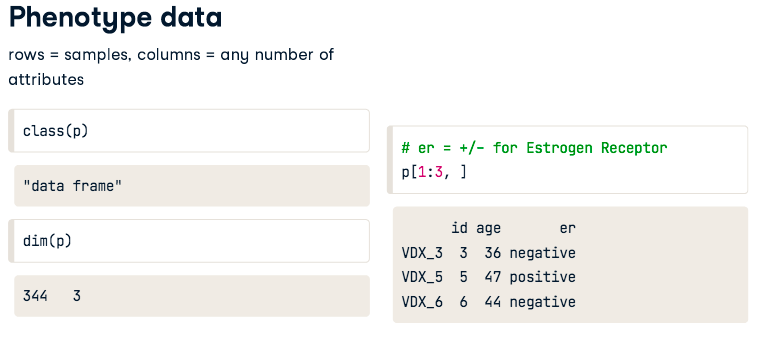

In [ ]:
# Create a boxplot of the first gene in the expression matrix
boxplot(x[1, ] ~ p[, "Disease"], main = f[1, "symbol"])

* Create a boxplot
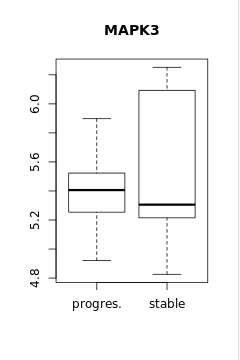

#### 1.2 The ExpressionSet class
1. Create an ExpressinSet object
2. Create a boxplot with an ExpressionSet object

In [ ]:
# Load package
library(Biobase)

# Create ExpressionSet object
eset <- ExpressionSet(assayData = x,
                      phenoData = AnnotatedDataFrame(p),
                      featureData = AnnotatedDataFrame(f))

# View the number of features (rows) and samples (columns)
dim(eset)

2. Boxplot of an ExpressionSet object

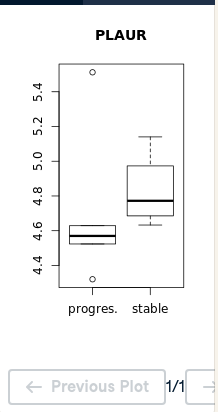

In [ ]:
# Subset to only include the first 10 samples (columns)
eset_sub <- eset[, 1:10]

# Check the dimensions of the subset
dim(eset_sub)

# Create a boxplot of the 1000th gene in eset_sub
boxplot(exprs(eset_sub)[1000, ] ~ pData(eset_sub)[, "Disease"],
        main = fData(eset_sub)[1000, "symbol"])

#### 1.3 The Limma package
1. Specify a linear model to compare 2 groups
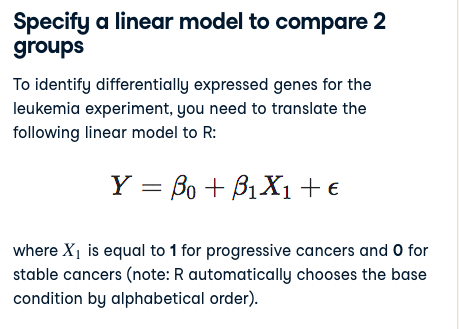
2. Test for differential expression between 2 groups


In [ ]:
# Specify a linear model to compare 2 groups
> colnames(pData(eset))
[1] "SampleID" "Disease" 

# Create design matrix for leukemia study
design <- model.matrix(~Disease, data = pData(eset))

# Count the number of samples modeled by each coefficient
colSums(design)


In [ ]:
> head(design)
          (Intercept) Diseasestable
CLL11.CEL           1             0
CLL12.CEL           1             1
CLL13.CEL           1             0
CLL14.CEL           1             0
CLL15.CEL           1             0
CLL16.CEL           1             0

# Load package
library(limma)

# Fit the model
fit <- lmFit(eset, design)

# Calculate the t-statistics
fit <- eBayes(fit)

# Summarize results
results <- decideTests(fit[, "Diseasestable"])
summary(results)

### 2. Flexible Models for Common Study Designs

1. Flexible linear models
2. Studies with more than two groups
3. Factorial experimental design


#### 2.1 Flexible linear models
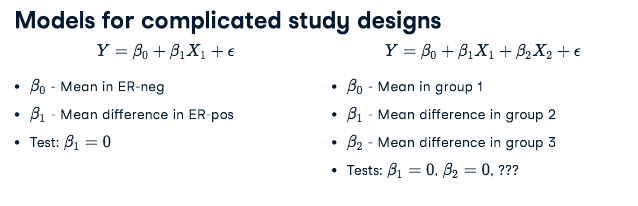

* Group-means parametrization
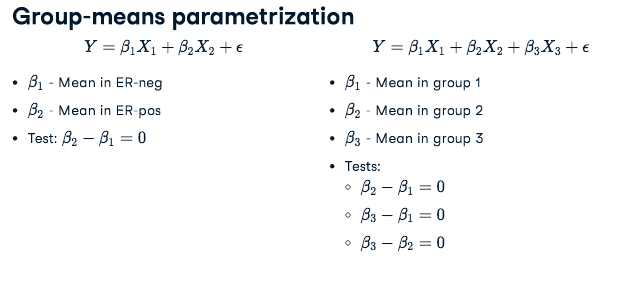

* Design matrix for group-means model
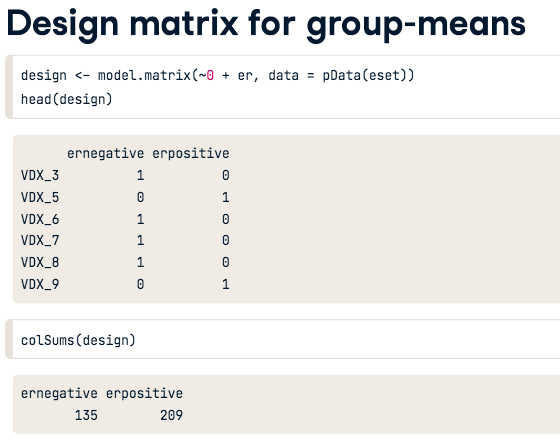





In [ ]:
> pData(eset)
          SampleID  Disease
CLL11.CEL    CLL11 progres.
CLL12.CEL    CLL12   stable
CLL13.CEL    CLL13 progres.
CLL14.CEL    CLL14 progres.

# Create design matrix with no intercept
design <- model.matrix(~0 + Disease, data = pData(eset))

# Count the number of samples modeled by each coefficient
colSums(design)

* Contrasts matrix for group-means
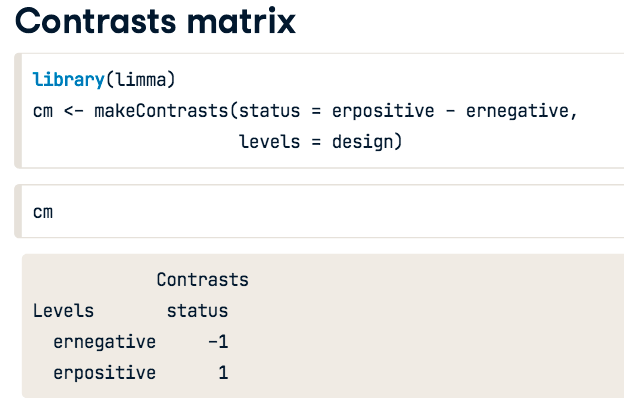

In [ ]:
>design
          Diseaseprogres. Diseasestable
CLL11.CEL               1             0
CLL12.CEL               0             1
CLL13.CEL               1             0
CLL14.CEL               1             0

# Load package
library(limma)

# Create a contrasts matrix
cm <- makeContrasts(status = Diseaseprogres. - Diseasestable,
                    levels = design)

# View the contrasts matrix
cm

* Test for differential expression for group-means
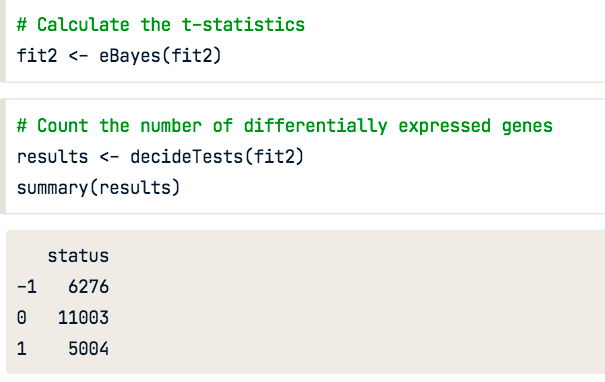

In [ ]:
# Load package
library(limma)

# Fit the model
fit <- lmFit(eset, design)

# Fit the contrasts
fit2 <- contrasts.fit(fit, contrasts = cm)

# Calculate the t-statistics for the contrasts
fit2 <- eBayes(fit2)

# Summarize results
results <- decideTests(fit2)
summary(results)

#### 2.2 Studies with more than two groups
1. Design matrix for 3 groups
2. Contrasts matrix for 3 groups
3. Test for differential expression for 3 groups


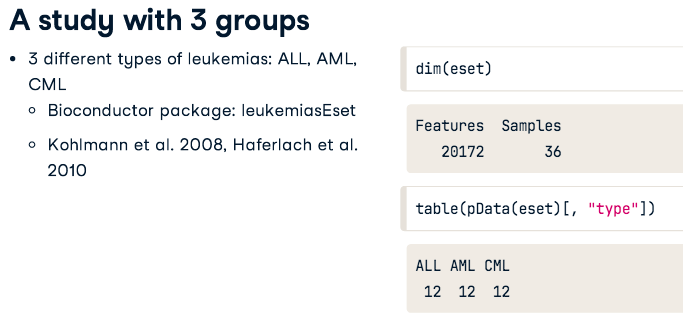

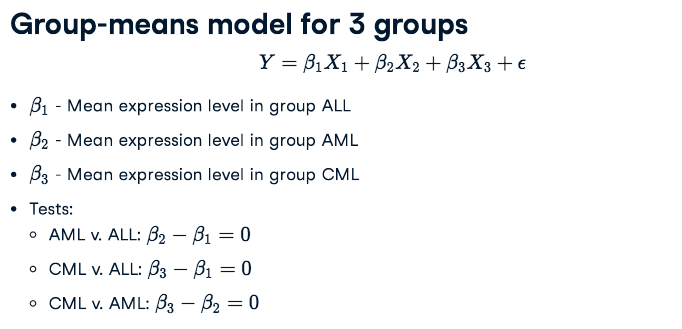

**Design matrix for 3 groups**

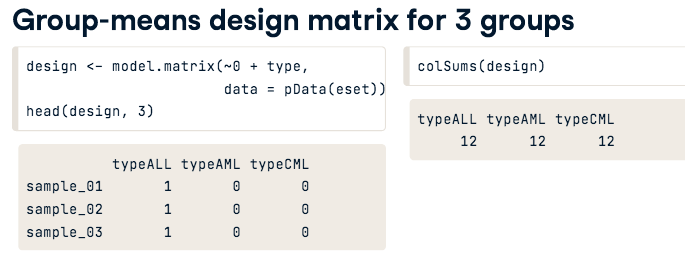

In [ ]:
# Design matrix for 3 groups with no intercept

# Create design matrix with no intercept
design <- model.matrix(~0 + oxygen, data = pData(eset))

# Count the number of samples modeled by each coefficient
colSums(design)

**Contrasts matrix for 3 groups**
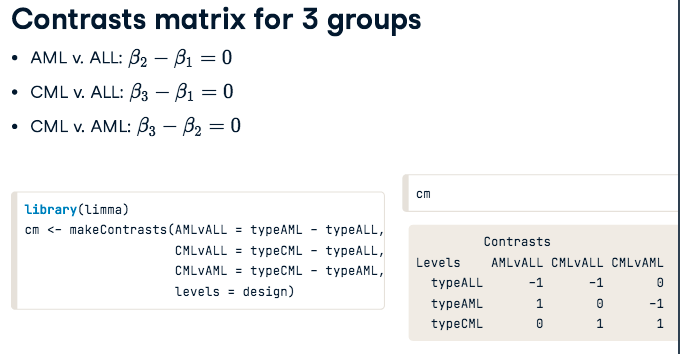

In [ ]:
> design
        oxygenox01 oxygenox05 oxygenox21
ox01_r1          1          0          0
ox01_r2          1          0          0
ox05_r1          0          1          0
ox05_r2          0          1          0
ox21_r1          0          0          1
ox21_r2          0          0          1

# Load package
library(limma)

# Create a contrasts matrix
cm <- makeContrasts(ox05vox01 = oxygenox05 - oxygenox01,
                    ox21vox01 = oxygenox21 - oxygenox01,
                    ox21vox05 = oxygenox21 - oxygenox05,
                    levels = design)

# View the contrasts matrix
cm

**Test for differential expression for 3 groups**
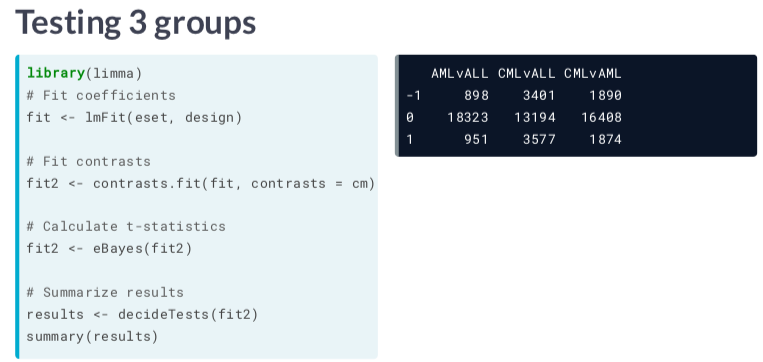

In [ ]:

# Load package
library(limma)

# Fit the model
fit <- lmFit(eset, design)

# Fit the contrasts
fit2 <- contrasts.fit(fit, contrasts = cm)

# Calculate the t-statistics for the contrasts
fit2 <- eBayes(fit2)

# Summarize results
results <- decideTests(fit2)
summary(results)

####2.3 Factorial experimental design
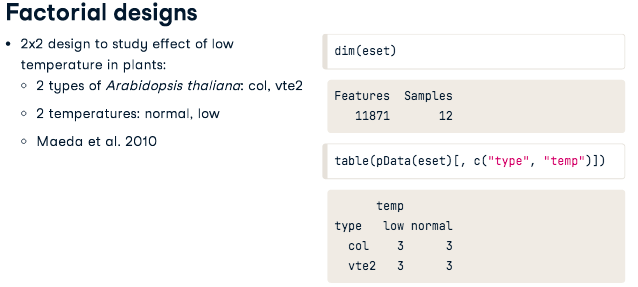

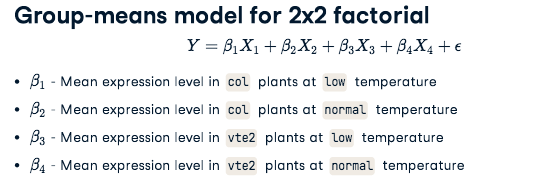

**Design Matrix for 2X2 factorial**
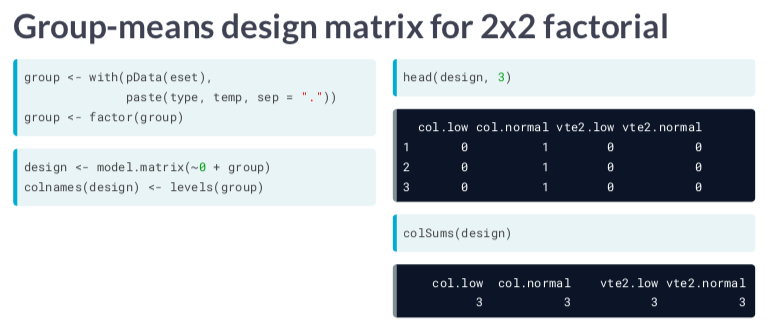

In [ ]:
# Create single variable
group <- with(pData(eset), paste(type, water, sep = "."))
group <- factor(group)

# Create design matrix with no intercept
design <- model.matrix(~0 + group)
colnames(design) <- levels(group)

# Count the number of samples modeled by each coefficient
colSums(design)

**Contrasts Matrix for 2X2 factorial**
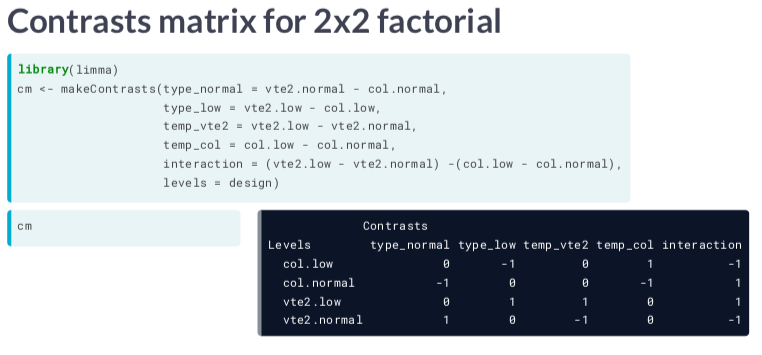

In [ ]:
>pData(eset)
                type   water rep
dn34_normal_r1  dn34  normal  r1
dn34_drought_r1 dn34 drought  r1
nm6_normal_r1    nm6  normal  r1
nm6_drought_r1   nm6 drought  r1

# Load package
library(limma)

# Create a contrasts matrix
cm <- makeContrasts(type_normal = nm6.normal - dn34.normal,
                    type_drought = nm6.drought - dn34.drought,
                    water_nm6 = nm6.drought - nm6.normal,
                    water_dn34 = dn34.drought - dn34.normal,
                    interaction = (nm6.drought - nm6.normal) - (dn34.drought - dn34.normal),
                    levels = design)

# View the contrasts matrix
cm

**Test for differential expression for 2*2 factorial**

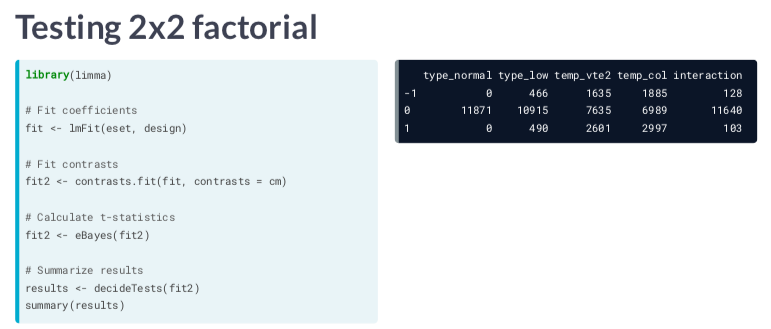

In [ ]:
# Load package
library(limma)

# Fit the model
fit <- lmFit(eset, design)

# Fit the contrasts
fit2 <- contrasts.fit(fit, contrasts = cm)

# Calculate the t-statistics for the contrasts
fit2 <- eBayes(fit2)

# Summarize results
results <- decideTests(fit2)
summary(results)

### 3. Pre- and Post-Processing
1. Normalizing and filtering
2. Accounting for technical batch effects
3. Visualizing the results
4. Enrichment Testing


#### 3.1 **Log-transformation and Quantile Normalization**
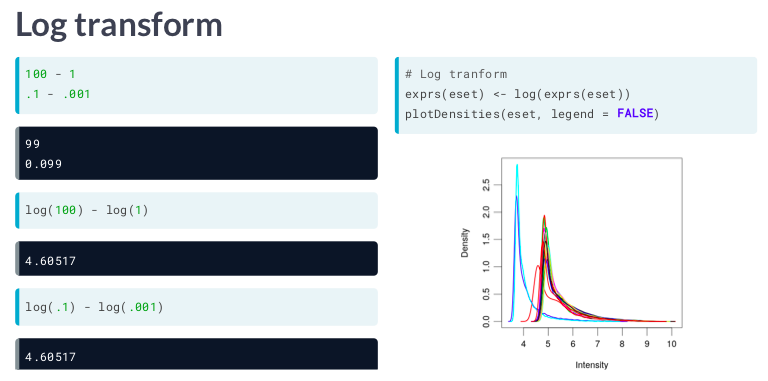

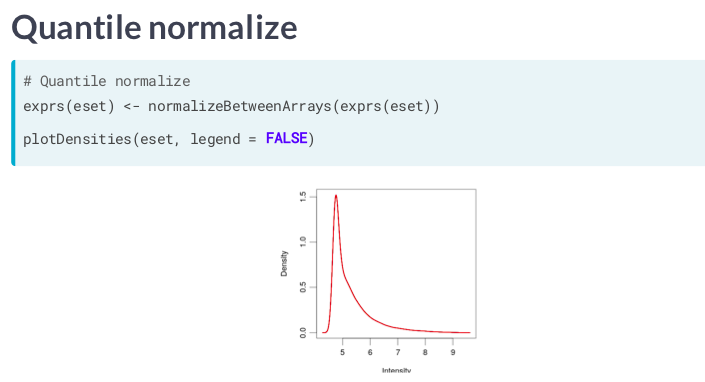

In [ ]:
library(limma)

# Create new ExpressionSet to store normalized data
eset_norm <- eset_raw

# View the distribution of the raw data
plotDensities(eset_norm, legend = FALSE)

# Log tranform
exprs(eset_norm) <- log(exprs(eset_norm))
plotDensities(eset_norm, legend = FALSE)

# Quantile normalize
exprs(eset_norm) <- normalizeBetweenArrays(exprs(eset_norm))
plotDensities(eset_norm, legend = FALSE)

**Filter Genes**: remove the lowly expressed genes that are not relevant to the system
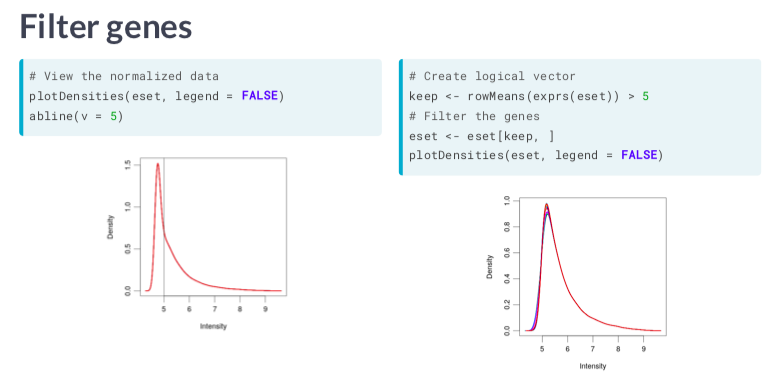


In [ ]:
library(limma)

# Create new ExpressionSet to store normalized data
eset_norm <- eset_raw

# View the distribution of the raw data
plotDensities(eset_norm, legend = FALSE)

# Log tranform
exprs(eset_norm) <- log(exprs(eset_norm))
plotDensities(eset_norm, legend = FALSE)

# Quantile normalize
exprs(eset_norm) <- normalizeBetweenArrays(exprs(eset_norm))
plotDensities(eset_norm, legend = FALSE)

#### 3.2 Accounting for technical batch effects
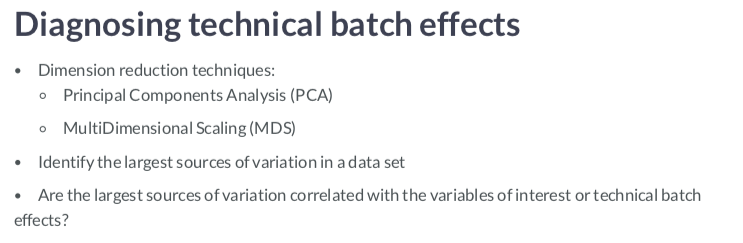

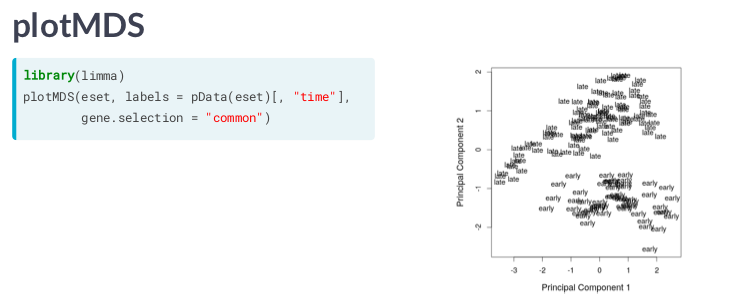
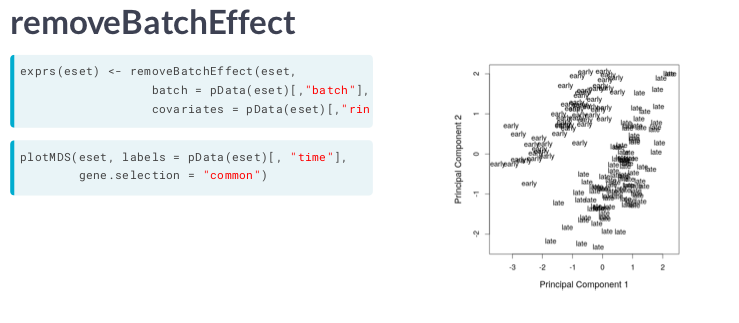

In [ ]:
# Load package
library(limma)

# Plot principal components labeled by treatment
plotMDS(eset, labels = pData(eset)[, "treatment"], gene.selection = "common")

# Plot principal components labeled by batch
plotMDS(eset, labels = pData(eset)[, "batch"], gene.selection = "common")

In [ ]:
# Load package
library(limma)

# Remove the batch effect
exprs(eset) <- removeBatchEffect(eset, batch = pData(eset)[,'batch'])

# Plot principal components labeled by treatment
plotMDS(eset, labels = pData(eset)[,'treatment'], gene.selection = 'common')

# Plot principal components labeled by batch
plotMDS(eset, labels = pData(eset)[,'batch'], gene.selection = 'common')

####3.3 Visualizing the results
1. Histogram of p-values
2. Volcano plot
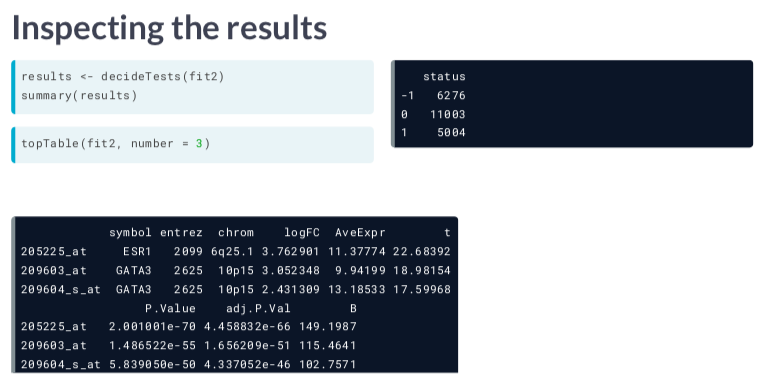

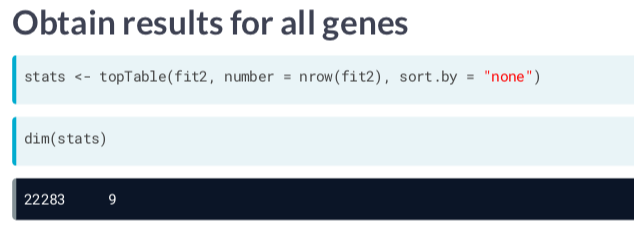

**Histogram of p-values**
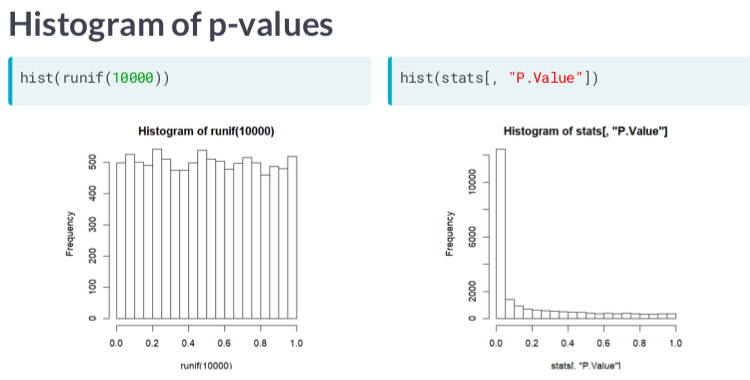

In [ ]:
# Obtain the summary statistics for every gene
stats <- topTable(fit2, number = nrow(fit2), sort.by = "none")

# Plot a histogram of the p-values
hist(stats[, "P.Value"])

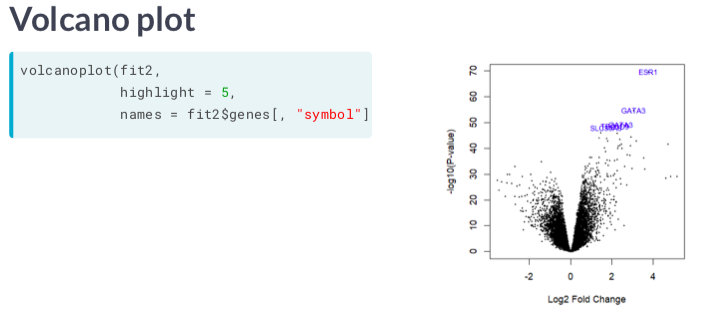

In [ ]:
# Create a volcano plot. Highlight the top 5 genes
volcanoplot(fit2, highlight = 5, names = fit2$genes[,'symbol'])

#### 3.4 Enrichment testing
1. KEGG pathways
2. Gene ontology categories

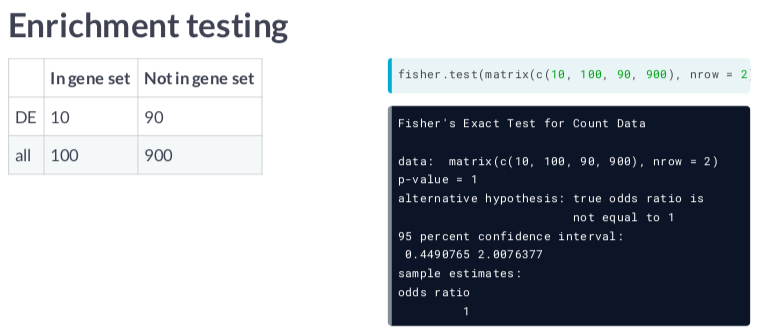


**KEGG pathways**
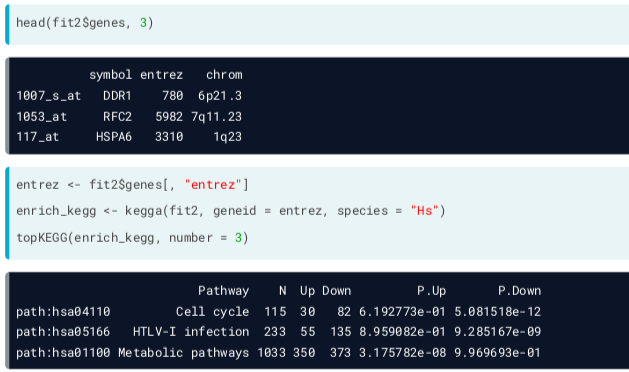

In [ ]:
>head(fit2$genes)
           symbol entrez    chrom
1000_at     MAPK3   5595  16p11.2
1001_at      TIE1   7075 1p34-p33
1002_f_at CYP2C19   1557    10q24

# Extract the entrez gene IDs
entrez <- fit2$genes[,'entrez']

# Test for enriched KEGG Pathways
enrich_kegg <- kegga(fit2, geneid = entrez, species = 'Hs')

# View the top 20 enriched KEGG pathways
topKEGG(enrich_kegg)

**Gene ontology categories**
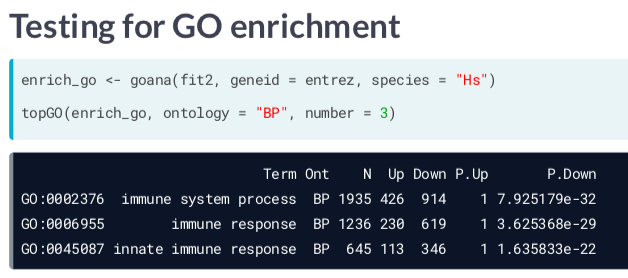

In [ ]:
# Extract the entrez gene IDs
entrez <- fit2$genes[,'entrez']

# Test for enriched GO categories
enrich_go <- goana(fit2, geneid = entrez, species = 'Hs')

# View the top 20 enriched GO Biological Processes
topGO(enrich_go, ontology = 'BP')

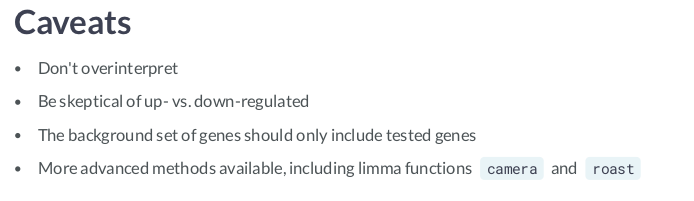

### Case Study: Effect of Doxorubicin Treatment
 1. Pre-process the data
 2. Model the data
 3. Inspect the results
 4. Conclusion
 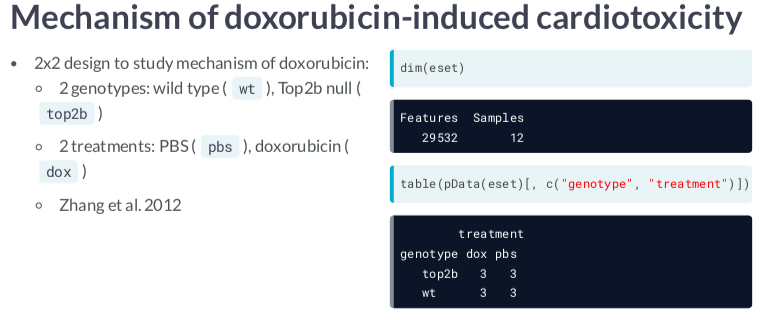
 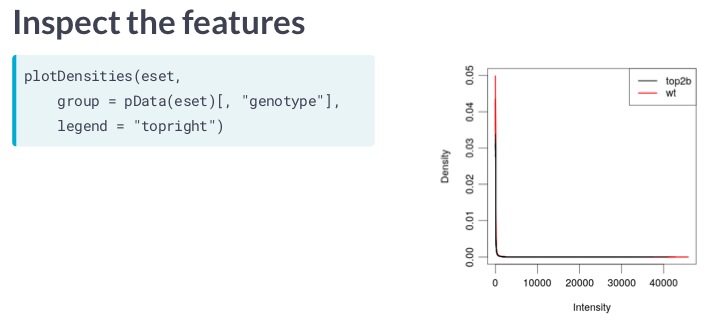

#### 4.1 Pre-process the data
1. pre-process features
2. Sanity Check: Boxplot of Top2b
3. Check sources of variation

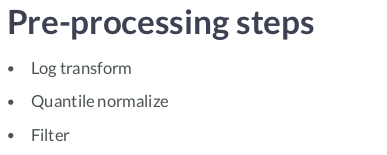

In [ ]:
> pData(eset)
             genotype treatment rep
wt.pbs.r1          wt       pbs  r1
wt.pbs.r2          wt       pbs  r2
wt.pbs.r3          wt       pbs  r3

# Create a new ExpressionSet to store the processed data
eset <- eset_raw

# Log transform
exprs(eset) <- log(exprs(eset))
plotDensities(eset,  group = pData(eset)[,'genotype'], legend = "topright")

# Quantile normalize
exprs(eset) <- normalizeBetweenArrays(exprs(eset))
plotDensities(eset,  group = pData(eset)[,'genotype'], legend = "topright")

# Determine the genes with mean expression level greater than 0
keep <- rowMeans(exprs(eset)) > 0
sum(keep)

# Filter the genes
eset <- eset[keep,]
plotDensities(eset, group = pData(eset)[,'genotype'], legend = "topright")

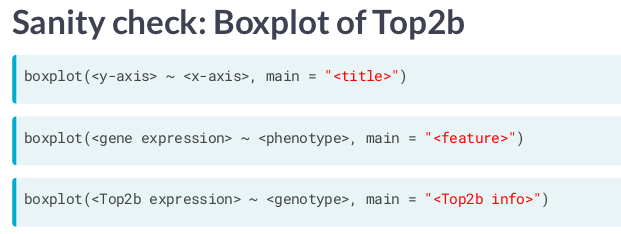

In [ ]:
>head(fData(eset))
              symbol entrez chrom
A_52_P169082   Dbil5  13168 chr11
A_51_P414243  C85492 215494  chr9

>pData(eset)
             genotype treatment rep
wt.pbs.r1          wt       pbs  r1
wt.pbs.r2          wt       pbs  r2
wt.pbs.r3          wt       pbs  r3

# Find the row which contains Top2b expression data
top2b <- which(fData(eset)[, "symbol"] == "Top2b")

# Plot Top2b expression versus genotype
boxplot(exprs(eset)[top2b, ] ~ pData(eset)[, "genotype"],
        main = fData(eset)[top2b, ])

Do the samples cluster by their genotype (WT vs. Top2b null) and treatment (PBS vs. Dox)?
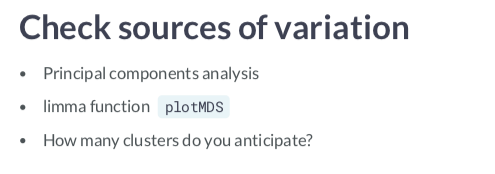

In [ ]:
# Plot principal components labeled by genotype
plotMDS(eset, labels = pData(eset)[, 'genotype'], gene.selection = "common")

# Plot principal components labeled by treatment
plotMDS(eset, labels = pData(eset)[, 'treatment'], gene.selection = "common")

#### 4.2 Model the data
1. Design matrix
2. Contrasts matrix
3. Test for differential expression

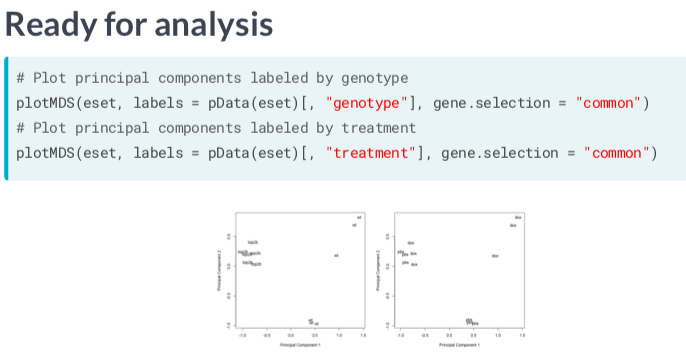

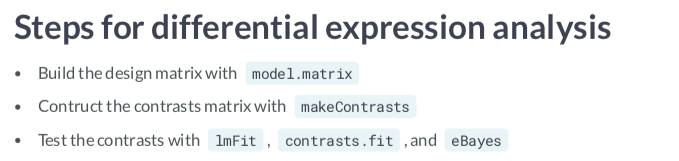

**Design Matrix**
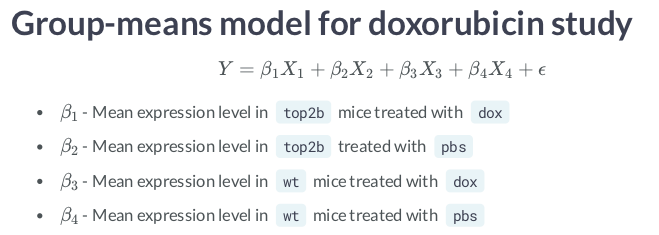

In [ ]:
# Create single variable
group <- with(pData(eset), paste(genotype, treatment, sep = "."))
group <- factor(group)

# Create design matrix with no intercept
design <- model.matrix(~0 + group)
colnames(design) <- levels(group)

# Count the number of samples modeled by each coefficient
colSums(design)

**Contrasts matrix**
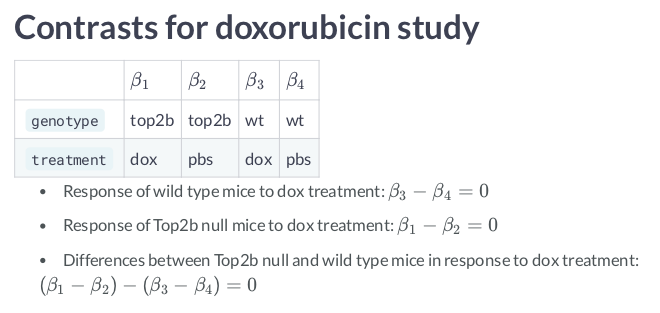

In [ ]:
# Create a contrasts matrix
cm <- makeContrasts(dox_wt = wt.dox - wt.pbs,
                    dox_top2b = top2b.dox - top2b.pbs,
                    interaction = (top2b.dox - top2b.pbs) - (wt.dox- wt.pbs),
                    levels = design)

# View the contrasts matrix
cm
           Contrasts
 Levels      dox_wt dox_top2b interaction
  top2b.dox      0         1           1
  top2b.pbs      0        -1          -1
  wt.dox         1         0          -1
  wt.pbs        -1         0           1

**Test for differential expression**
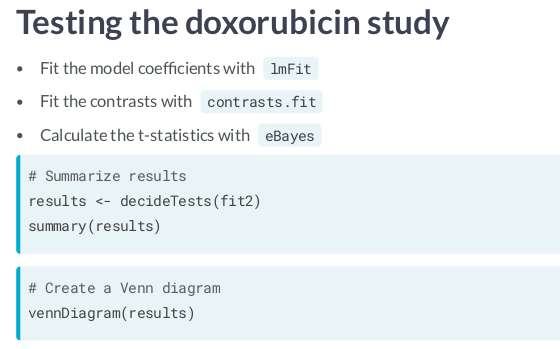

In [ ]:
# Fit the model
fit <- lmFit(eset, design)

# Fit the contrasts
fit2 <- contrasts.fit(fit, contrasts = cm)

# Calculate the t-statistics for the contrasts
fit2 <- eBayes(fit2)

# Summarize results
results <- decideTests(fit2)
summary(results)

# Create a Venn diagram
vennDiagram(results)

#### 4.3 Inspect the results
1. Histogram of p-values
2. Volcano plot
3. Pathway enrichment
4. Conclusion

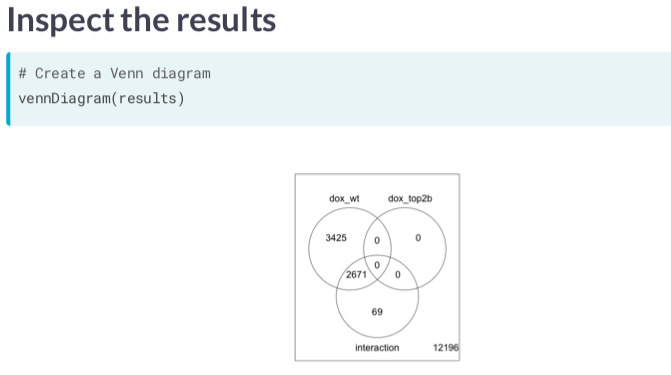

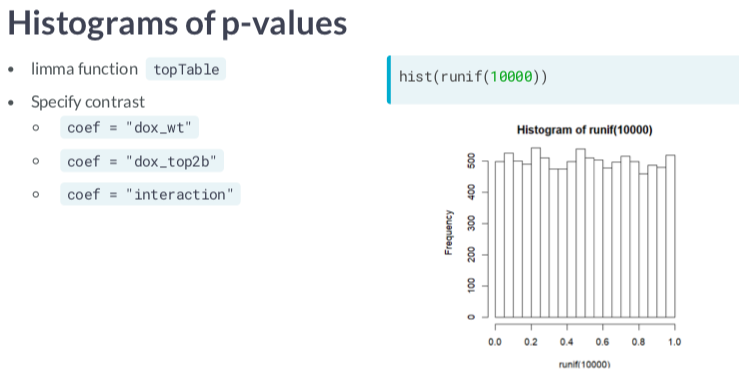

In [ ]:
# Obtain the summary statistics for the contrast dox_wt
stats_dox_wt <- topTable(fit2, coef = "dox_wt", number = nrow(fit2),
                         sort.by = "none")
# Obtain the summary statistics for the contrast dox_top2b
stats_dox_top2b <- topTable(fit2, coef = "dox_top2b", number = nrow(fit2),
                            sort.by = "none")
# Obtain the summary statistics for the contrast interaction
stats_interaction <- topTable(fit2, coef = "interaction", number = nrow(fit2),
                              sort.by = "none")

# Create histograms of the p-values for each contrast
hist(stats_dox_wt[,"P.Value"])
hist(stats_dox_top2b[,"P.Value"])
hist(stats_interaction[,"P.Value"])

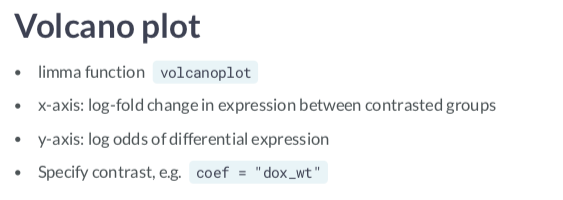

In [ ]:
# Extract the gene symbols
gene_symbols <- fit2$genes[, "symbol"]

# Create a volcano plot for the contrast dox_wt
volcanoplot(fit2, coef = "dox_wt", highlight = 5, names = gene_symbols)

# Create a volcano plot for the contrast dox_top2b
volcanoplot(fit2, coef = "dox_top2b", highlight = 5, names = gene_symbols)

# Create a volcano plot for the contrast interaction
volcanoplot(fit2, coef = "interaction", highlight = 5, names = gene_symbols)

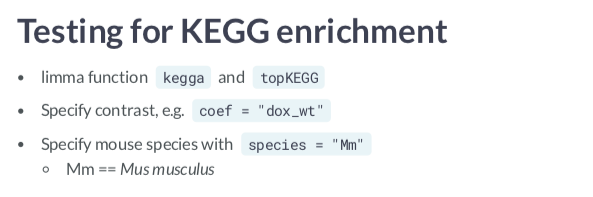

In [ ]:
# Extract the entrez gene IDs
entrez <- fit2$genes[,"entrez"]

# Test for enriched KEGG Pathways for contrast dox_wt
enrich_dox_wt <- kegga(fit2, coef = "dox_wt", geneid = entrez, species = "Mm")

# View the top 5 enriched KEGG pathways
topKEGG(enrich_dox_wt, number = 5)

# Test for enriched KEGG Pathways for contrast interaction
enrich_interaction <- kegga(fit2, coef = "interaction", geneid = entrez, species = "Mm")

# View the top 5 enriched KEGG pathways
topKEGG(enrich_interaction, number = 5)

####4.4 Conclusion
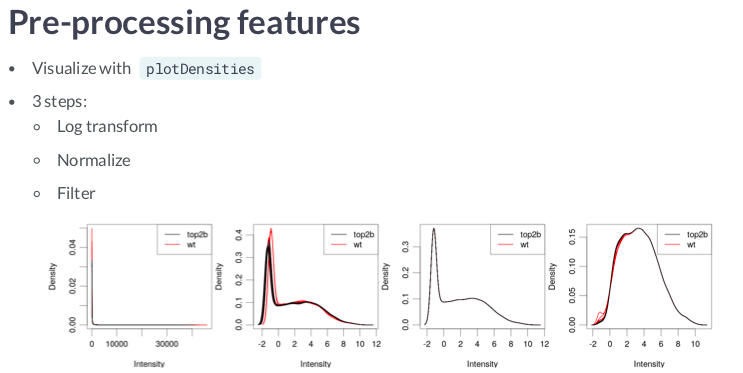

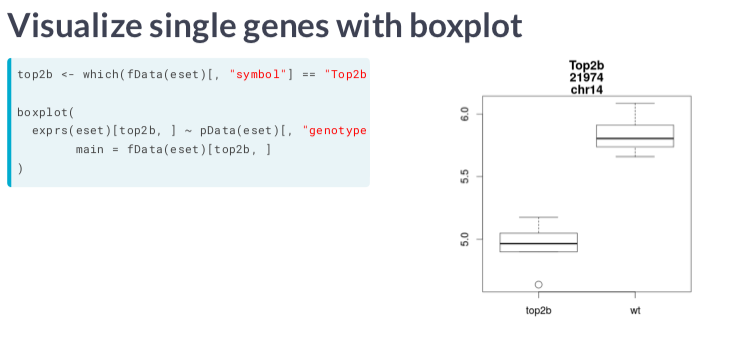

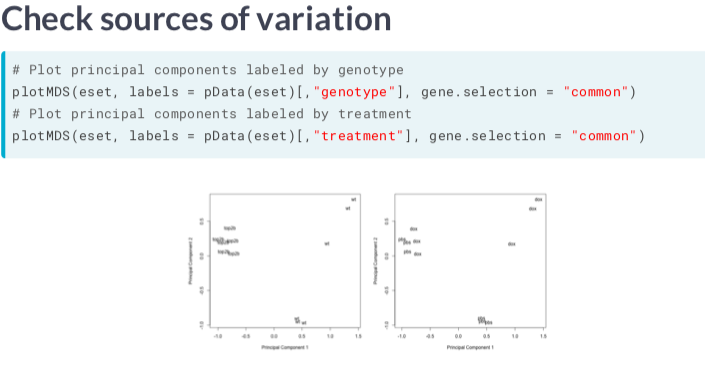

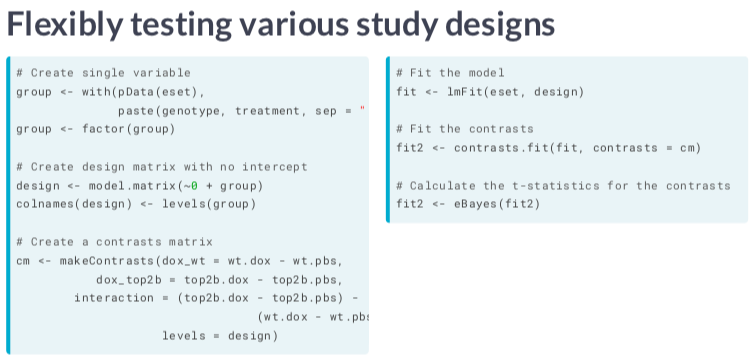

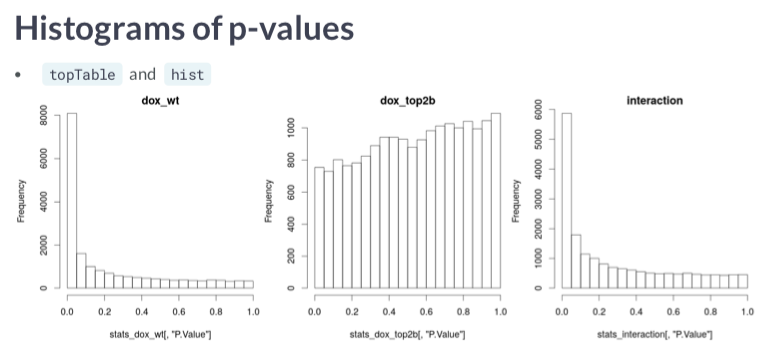

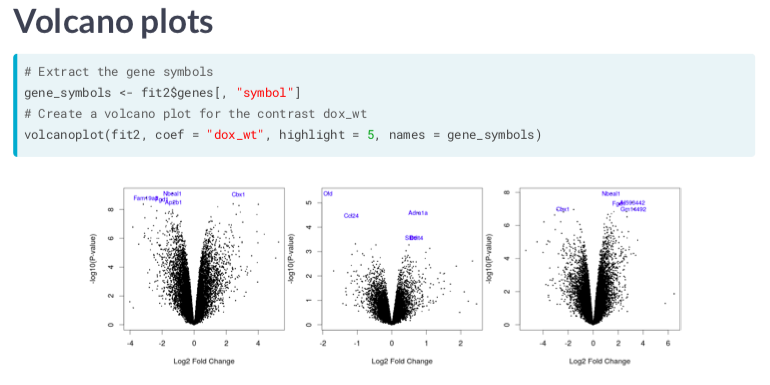

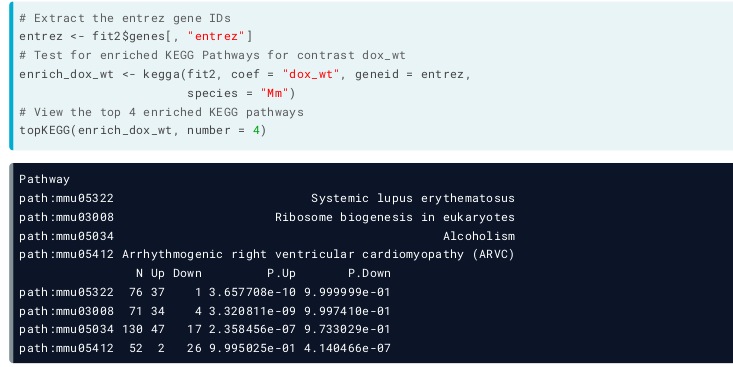